In [1]:
!pip install opencv-python
!pip install mahotas
#!pip install tensorflow
#!pip install keras

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
# organize imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
import cv2
import os
import h5py
import scipy


In [3]:
# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [4]:
# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick

In [5]:
# feature-descriptor-3: Color Histogram
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    #hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    hist = cv2.calcHist([image],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    hist=hist.flatten()
    import numpy as np
    meanss=np.mean(hist)
    stdss=np.std(hist)
    #Combining means and std
    #import numpy as np
    #statss=np.concatenate([meanss,stdss]).flatten()
    stats = np.array([meanss,stdss])
    (means,stds)=cv2.meanStdDev(image)
    #Combining means and std
    import numpy as np
    statss=np.concatenate([means,stds]).flatten()
    result = np.hstack([statss,stats])
    return hist.flatten()

In [6]:
def get_data_for_prediction(img_file):
    """
    Load the data and labels from the given folder.
    """
    global_features = []
    y = []
    
    if img_file is not None:
        # Downsample the image to 120, 160, 3
        #img_file=skimage.transform.resize(arr=img_file, size=(240, 320, 3))
        #img_file = scipy.misc.imresize(arr=img_file, size=(64, 64, 3))
        img_file=np.array(Image.fromarray(img_file).resize(size=(64, 64)))
        #img_arr = np.asarray(img_file)
        #X.append(img_arr)
                    
        ####################################
        # Global Feature extraction
        ####################################
        fv_hu_moments = fd_hu_moments(img_file)
        fv_haralick   = fd_haralick(img_file)
        fv_histogram  = fd_histogram(img_file)
                
        #hog_features1 = np.array(hog1(img_file))
        ###################################
        # Concatenate global features
        ###################################
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
        #global_feature = np.hstack([ hog_features1])
        global_features.append(global_feature)
      
                
    global_features = np.asarray(global_features)
    
    return global_features


In [8]:
#img = cv2.imread('neuttest.bmp')

def WBC_classification(img):
    from tensorflow.keras.models import load_model
    import cv2
    import numpy as np
    from sklearn.preprocessing import MinMaxScaler
    model = load_model('WBC_model_keras.h5')
   
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    model.load_weights('WBC_model_wieghts.h5')
    
    global_features=get_data_for_prediction(img)
    #print(global_features)
    
    from sklearn.externals import joblib
    scaler1 = joblib.load("scaler.save") 
    #print(scaler1.data_max_)
    
    #scale_min=scaler.data_min_
    #scale_max=scaler.data_max_
    #scaler = MinMaxScaler(feature_range=(0, 1))
    #X_std=(global_features-scale_min)/(scale_max-scale_min)
    #rescaled_features=X_std*(1-0)+0
    rescaled_features = scaler1.transform(global_features)
    #img = cv2.resize(img,(64,64))
    #img = np.reshape(img,[1,64,64,3])
    #print(rescaled_features)
    classes = model.predict_classes(rescaled_features)
    #if classes[0]==0:
    #    label="BASOPHIL"
    if classes[0]==0:
        label="EOSINOPHIL"
    elif classes[0]==1:
        label="LYMPHOCYTE"
    elif classes[0]==2:
        label="MONOCYTES"
    else:
        label="NEUTROPHIL"

    print(classes)
    #print (type(classes))
    return label
    
#wbc_label=WBC_classification(img)
#print("WBC TYPE:",wbc_label)

Area of image 30545
(149, 205)


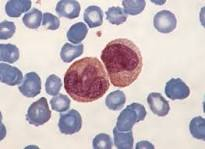

In [9]:
import cv2
from PIL import Image
#image = cv2.imread('/home/sandeep/Sandeep/Python_bloodTest/blood_count/code/clould_code/Testing data/4.jpeg')
image = cv2.imread('/home/sandeep/Downloads/Images/testing/monocytes.jpeg')
#image=cv2.imread('/resources/Blood count project/WBC TESTING/Testing data/P1.jpg')
image1=image.copy()
#image = cv2.imread('/resources/data/patient_1.jpg')
# OpenCV's 'split' function splites the image into each color index
B, G, R = cv2.split(image)
image_area=B.shape[0]*B.shape[1]
print("Area of image",image_area)
print(B.shape)
Image.fromarray(image)

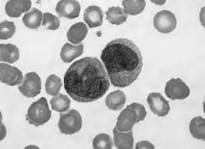

In [10]:
Image.fromarray(G)

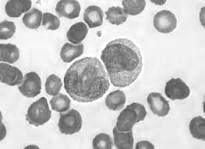

In [11]:
Image.fromarray(B)

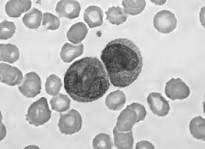

In [12]:
Image.fromarray(R)

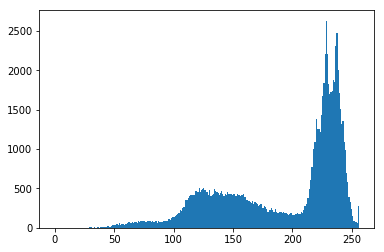

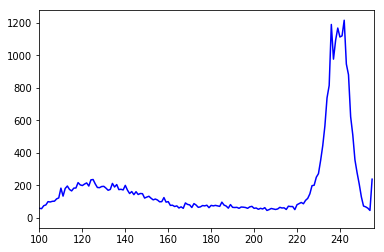

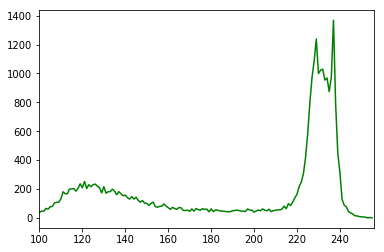

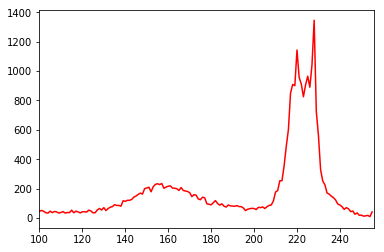

In [13]:
# We need to import matplotlib to create our histogram plots
from matplotlib import pyplot as plt
%matplotlib inline
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# We plot a histogram, ravel() flatens our image array 
plt.hist(image.ravel(), 256, [0, 256]); plt.show()

# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram

histogram2 = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.plot(histogram2, color = 'b')
plt.xlim([100,256])
plt.show()

histogram2 = cv2.calcHist([image], [1], None, [256], [0, 256])
plt.plot(histogram2, color = 'g')
plt.xlim([100,256])

plt.show()

histogram2 = cv2.calcHist([image], [2], None, [256], [0, 256])
plt.plot(histogram2, color = 'r')
plt.xlim([100,256])

plt.show()

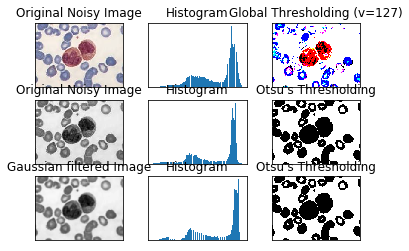

In [14]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = image
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(G,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(G,(5,5),0)
ret3,th3 = cv.threshold(G,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          G, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()



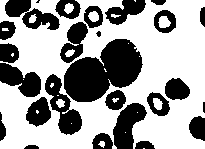

In [15]:
Image.fromarray(th3)

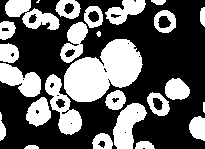

In [16]:
#invert
newimg = cv2.bitwise_not(th3)
Image.fromarray(newimg)

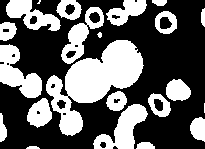

In [17]:
# closing
kernel = np.ones((2,2),np.uint8)
closed = cv2.morphologyEx(newimg, cv2.MORPH_CLOSE, kernel)
Image.fromarray(closed)

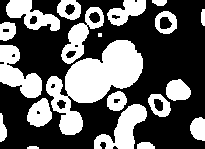

In [18]:
# opening
kernel = np.ones((3,3),np.uint8)
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)
Image.fromarray(opened)

In [19]:
#find contours of white objects
#SSSS im2, contours, hierarchy = cv2.findContours(opened,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(opened,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [20]:
#filling the "holes" of the white objects (red blood cells). 
#This is needed for proper segmentation with the watershed algorithm
for cnt in contours:
    cv2.drawContours(opened,[cnt],0,255,-1)

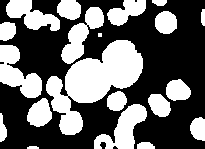

In [21]:
Image.fromarray(opened)

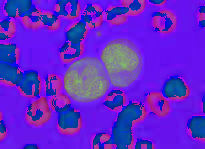

In [22]:
#hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
Image.fromarray(hsv_image)


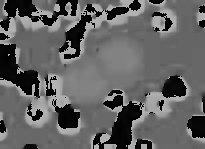

In [23]:
Image.fromarray(hsv_image[:, :, 0])   #Hue channel

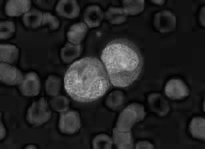

In [24]:
Image.fromarray(hsv_image[:, :, 1])   #Saturation channel

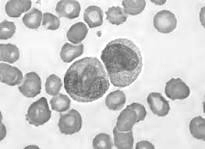

In [25]:





































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































Image.fromarray(hsv_image[:, :, 2])   #Value channel

In [26]:
#ssssss blur = cv.GaussianBlur(hsv_image[:, :, 1],(7,7),0)
blur = cv.GaussianBlur(hsv_image[:, :, 1],(5,5),0)
ret3,th33 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

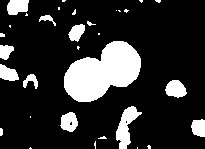

In [27]:
Image.fromarray(th33)

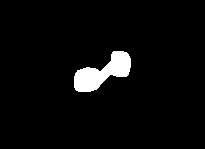

In [28]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
erosion = cv2.erode(th33,kernel,iterations = 10) # dilate
Image.fromarray(erosion)

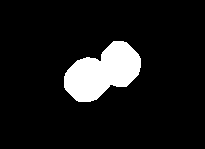

In [29]:
dilated = cv2.dilate(erosion,kernel,iterations = 10) # dilate

Image.fromarray(dilated)

<class 'numpy.ndarray'>
(61, 77, 3)
(120, 120, 3)


/home/sandeep/.local/lib/python3.5/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


[3]
WBC TYPE: NEUTROPHIL
Resized Dimensions :  (100, 100, 3)


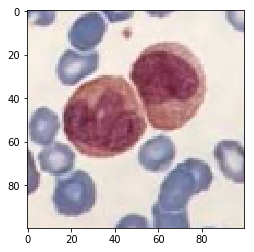

Number of WBC: 1
Number of Platlets 0


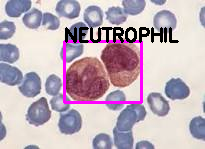

In [30]:
#SSSS _,contours,heirarcy= cv2.findContours(th33,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
#contours,heirarcy= cv2.findContours(th33,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
contours,heirarcy= cv2.findContours(dilated,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

count_platlets=0
count_WBC=0
image2=image.copy()
for contour in contours:
 
    # get rectangle bounding contour
    print(type(contour))
    [x,y,w,h]= cv2.boundingRect(contour)
    
    # draw rectangle around contour on original image
    #if h<10 or w<10:
    if h<30 or w<30:
        count_platlets=count_platlets+1
        print("count_platlets TYPE:",count_platlets)
        cv2.putText(image1,"P",(x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.6,(0,0,0),2)
        #continue
    
    else :
        count_WBC=count_WBC+1
        cv2.rectangle(image1,(x,y),(x+w,y+h),(255,0,255),2)
        
        #cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)
        #idx+=1
    
        new_img=image1[y:y+h,x:x+w]
        print(new_img.shape)
        #plt.imshow(new_img, cmap='gray')
        #plt.show()
        
        try:
            new_img1=image2[y-20:y+100,x-20:x+100]
            #new_img1=image2[y-5:y+h+10,x-5:x+w+10]
            print(new_img1.shape)
            resized = cv2.resize(new_img1, (100,100), interpolation = cv2.INTER_AREA)
        except:
            new_img1=image2[y:y+h,x:x+w]
            print(new_img1.shape)
            resized = cv2.resize(new_img1, (100,100), interpolation = cv2.INTER_AREA)
            
        
        wbc_label=WBC_classification(resized)
        
        cv2.putText(image1,wbc_label,(x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.6,(0,0,0),2)
        print("WBC TYPE:",wbc_label)
        print('Resized Dimensions : ',resized.shape)
        plt.imshow(resized, cmap='gray')
        plt.show()
    
# write original image with added contours to disk  
 
cv2.imwrite("contoured1.jpg", image1)
print("Number of WBC:",count_WBC)
print("Number of Platlets",count_platlets)
Image.fromarray(image1)

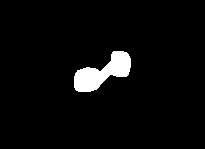

In [31]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
erosion = cv2.erode(th33,kernel,iterations = 10) # dilate
Image.fromarray(erosion)

In [ ]:
dilated = cv2.dilate(erosion,kernel,iterations = 10) # dilate

Image.fromarray(dilated)

In [ ]:
#SSSS _,contours,heirarcy= cv2.findContours(dilated,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
contours,heirarcy= cv2.findContours(dilated,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
image2=image.copy()
for contour in contours:
 
    # get rectangle bounding contour
    print(type(contour))
    [x,y,w,h]= cv2.boundingRect(contour)
    
    # draw rectangle around contour on original image
    if h<30 or w<30:
        continue
    cv2.rectangle(image2,(x,y),(x+w,y+h),(255,0,255),2)
    #cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)
    #idx+=1
    
    new_img=image2[y:y+h,x:x+w]
    plt.imshow(new_img, cmap='gray')
    plt.show()
    
# write original image with added contours to disk  
 
cv2.imwrite("contoured1.jpg", image2)

Image.fromarray(image2)
#plt.imshow(image1, cmap='gray')
#plt.show()


In [ ]:
th333 = cv2.dilate(th33,kernel,iterations = 3) # dilate

Image.fromarray(th333)

In [ ]:
current=newimg-th33
Image.fromarray(current)

In [ ]:
# closing
kernel = np.ones((2,2),np.uint8)
closed1 = cv2.morphologyEx(current, cv2.MORPH_CLOSE, kernel)
Image.fromarray(closed1)

In [ ]:
# opening
kernel = np.ones((5,5),np.uint8)
opened1 = cv2.morphologyEx(closed1, cv2.MORPH_OPEN, kernel)
Image.fromarray(opened1)

In [ ]:
#find contours of white objects
#SSS im2, contours, hierarchy = cv2.findContours(opened1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(opened1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
#filling the "holes" of the white objects (red blood cells). 
#This is needed for proper segmentation with the watershed algorithm
for cnt in contours:
    
    cv2.drawContours(opened1,[cnt],0,255,-1)
        

In [ ]:
Image.fromarray(opened1)

In [ ]:
#filling the "holes" of the white objects (red blood cells). 
#This is needed for proper segmentation with the watershed algorithm
for cnt in contours:
    area = cv2.contourArea(cnt)
    #if 800 < area < 10000:
    #    cv2.drawContours(opened1,[cnt],0,255,-1)
    #    [x,y,w,h]= cv2.boundingRect(cnt)
    
    # draw rectangle around contour on original image
 
    #    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)

In [ ]:
Image.fromarray(image)

In [ ]:
import numpy as np
import matplotlib
#matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import cv2



file_location=image.copy()
#file_location = '/resources/data/1.bmp' #this is where you input your image directory inside the '' (add double back slashes instead of single ones to avoid errors)
minRadius=10
maxRadius=30
file_name='test'
def RBCs_count(file_location,min_Radius, max_Radius, file_name):
    '''This function will count the number of RBCs in a given Giemsa-stained image'''
    #pic = cv2.imread(file_location)
    pic=file_location
    #img = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY) #converts image to black and white
    #image = np.copy(img) #copy of the original image
    num_RBC = np.copy(pic)
    #retrieval, gray_threshold2 = cv2.threshold(img, 0, 225, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) #this is a thresholding filter that allows for simplification of the image that distinguishes the background from the foreground, making it easier for the HoughCircles functions to identify the RBCs
    #cells = cv2.HoughCircles(gray_threshold2, cv2.HOUGH_GRADIENT, int(1.2), 40, param1 = 100, param2=9 , minRadius= min_Radius, maxRadius= max_Radius) #depending on the magnification of the Giemsa image, these parameters might have to be adjusted (namely the minRadius and maxRadius) (parameters 1 and 2 threshold the canny edge detection algorithm within HoughCircles - parameter 1 should typically be kept higher than 2 for Gimsea-stained images)
    cells = cv2.HoughCircles(opened1, cv2.HOUGH_GRADIENT, int(1.2), 40, param1 = 100, param2=8 , minRadius= min_Radius, maxRadius= max_Radius) 
    if len(cells) > 0:
        cells2 = cells[0, :]
    for (x, y, r) in cells2:
        x, y, r = int(x), int(y), int(r)
        cv2.circle(num_RBC, (x, y), r, (0, 255, 0), 3)
        cv2.rectangle(num_RBC, (x - 5, y - 5), (x + 5, y + 5), (0, 225, 0), -1)
    plt.figure(figsize = (10, 10))
    plt.imshow(num_RBC)
    plt.savefig(file_name + '.png')
    print('number of Red cells: %d' % len(cells[0, :]))
    
    return len(cells[0, :])
    

num_RBC=RBCs_count(file_location,minRadius,maxRadius,file_name)

In [ ]:
image=image.copy()
rbc_count=num_RBC
def normalised_RBCcount(image,rbc_count):
    area=image.shape[0]*image.shape[1]
    norm_count=(rbc_count/area)*10000
    return norm_count
result=normalised_RBCcount(image,rbc_count)
print("RBC count",result)

In [ ]:
image=image.copy()
wbc_count=count_WBC
def normalised_WBCcount(image,wbc_count):
    
    norm_count=wbc_count*3000
    return norm_count
result=normalised_WBCcount(image,wbc_count)
print("WBC count",result)

In [ ]:
image3=image.copy()
Image.fromarray(image3)

In [ ]:
print("Number of WBC:",count_WBC)
print("Number of Platlets",count_platlets)
Image.fromarray(image1)

In [ ]:
num_RBC=RBCs_count(file_location,minRadius,maxRadius,file_name)